<a href="https://colab.research.google.com/github/macapagithub/exaple-unsupervised-learning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_train_labels = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_labels.csv'
url_test_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/test_set_features.csv'
url_train_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_features.csv'

In [3]:
test_features_df = pd.read_csv(url_test_features)
train_features_df = pd.read_csv(url_train_features)
train_labels_df = pd.read_csv(url_train_labels)

In [ ]:
# joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# print(joined_df.shape)
# joined_df.head(3)

In [4]:
from sklearn.cluster import KMeans
number_cluster = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(train_labels_df)
    number_cluster.append(kmeans.inertia_)


In [5]:
number_cluster

[1587428143491.6765,
 396860789864.5891,
 176403637627.1084,
 99261321674.60135,
 63510348752.24649,
 44189218317.771576,
 32406602759.655006,
 24824292975.619087,
 19627579777.72254,
 15919945844.319653,
 13135447788.701538,
 11067960071.504171]

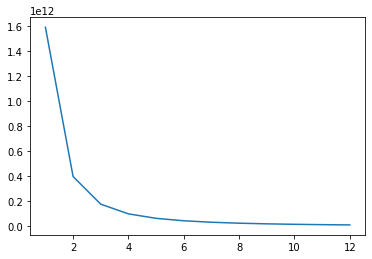

In [6]:
plt.plot(range(1,13), number_cluster)

In [7]:
features = []
for c in train_features_df.columns:
    t = str(train_features_df[c].dtype)
    if "int" in t or "float" in t:
        features.append(c)
features

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [8]:
df_features = train_features_df[features]
df_features.head(1)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0


In [9]:
df_features = df_features.fillna(0)
# df.fillna(0)

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_features)
y_kmeans = kmeans.fit_predict(df_features)
centroids = kmeans.cluster_centers_
y_kmeans

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [11]:
# centroids
X = np.array(df_features)
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 3.0000e+00, 2.0000e+00, ..., 4.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.0000e+00,
        0.0000e+00],
       ...,
       [2.6704e+04, 2.0000e+00, 2.0000e+00, ..., 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6705e+04, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.6706e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

## PCA

In [26]:
df_features.shape

(26707, 24)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
dt_features = StandardScaler().fit_transform(df_features)
pca = PCA(n_components = 2)
pca.fit(df_features)

PCA(n_components=2)

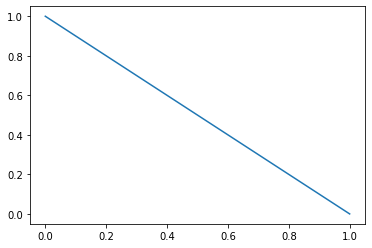

In [30]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()